In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

plt.style.use("default")
warnings.filterwarnings('ignore')

### Загрузим уже обработанные в прошлом ДЗ данные!

In [3]:
df = pd.read_csv('processed_sigma.csv')
df = df.drop("Trip_ID", axis=1)

X = df.drop("Surge_Pricing_Type", axis=1)
Y = df["Surge_Pricing_Type"]

### Principal component analysis (PCA)

**Задание 1.** Спроецируйте данные на двумерную плоскость, используя `PCA`. Другими словами, выделите первые две главные компоненты и изобразите данные в осях этих компонент. Не забудьте центрировать признаки перед применением метода. 

**Какую долю изначальной дисперсии (информации) содержат/объясняют в себе обе компоненты?** Для этого воспользуйтесь атрибутом `explained_variance_ratio_` у PCA-класса.

In [4]:
### Центрируем данные

### Your code is here

X_centered = X - X.mean()

In [5]:
from sklearn.decomposition import PCA

### Your code is here

pca = PCA(n_components=2)

pca_df = pca.fit_transform(X_centered)
pca_df = pd.DataFrame(pca_df, columns=['PCA_1', 'PCA_2'])
pca_df.head()


,PCA_1,PCA_2
0,-38.743132,-23.282634
1,-13.209252,-25.023815
2,-2.004910,-1.637085
3,17.178458,-0.907657
4,14.477389,-11.656752


In [19]:
PCA_dataset = pca_df.copy()
PCA_dataset["Surge_Pricing_Type"] = Y.values.reshape(-1, 1)

<Axes: xlabel='PCA_1', ylabel='PCA_2'>

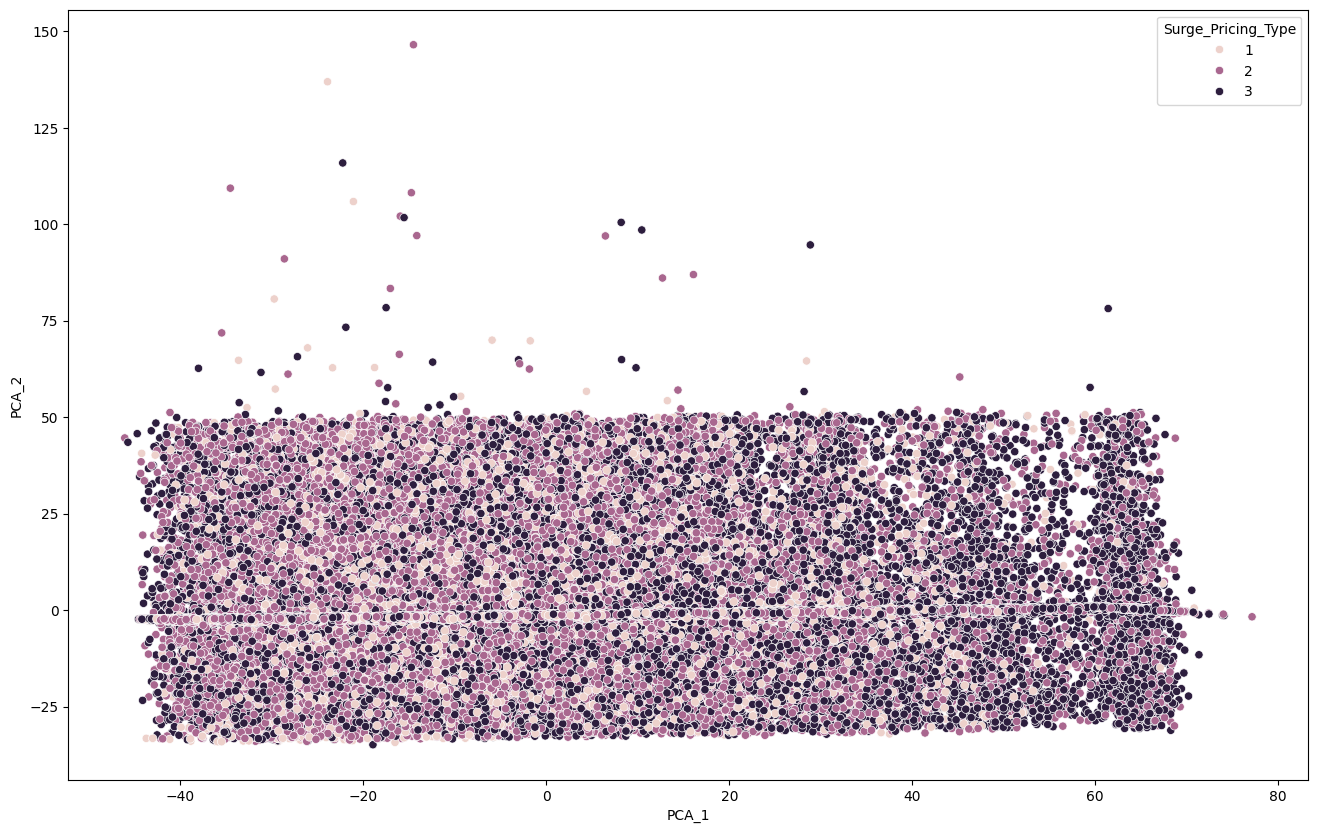

In [46]:

plt.figure(figsize=(16, 10))

sns.scatterplot(data=PCA_dataset, x="PCA_1", y="PCA_2", hue='Surge_Pricing_Type')

In [29]:
pca.explained_variance_ratio_

array([0.63176117, 0.21129863])

**Задание 2.** Изобразите heatmap корреляции изначальных признаков с новыми двумя главными компонентами. \
**Какие признаки коррелируют с первой компонентой? Какие со второй? В качестве порогового значения договоримся о корреляции >= 0.5 по абсолютному значению **


In [24]:
### Your code is here

corr = pd.DataFrame()
corr['PCA_1'] = X.corrwith(pca_df['PCA_1']).abs()
corr['PCA_2'] = X.corrwith(pca_df['PCA_2']).abs()
corr.head()

,PCA_1,PCA_2
Trip_Distance,0.997767,0.018410
Customer_Since_Months,0.121591,0.003500
Life_Style_Index,0.480658,0.025901
Customer_Rating,0.070104,0.003757
Cancellation_Last_1Month,0.000803,0.008960


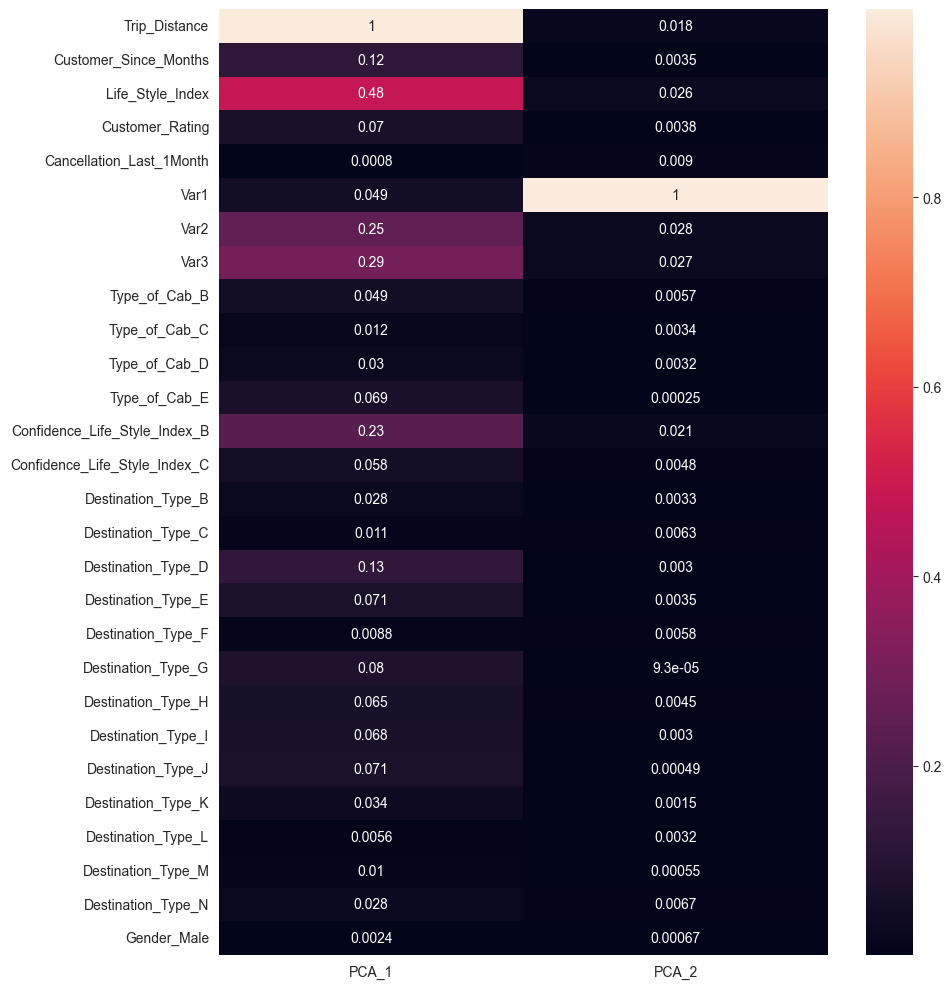

In [42]:
plt.figure(figsize=(10, 10))

sns.heatmap(corr, annot=True)

plt.tight_layout()

In [40]:
corr["PCA_1"].sort_values(ascending=False).head()

Trip_Distance                    0.997767
Life_Style_Index                 0.480658
Var3                             0.293819
Var2                             0.247178
Confidence_Life_Style_Index_B    0.227304
Name: PCA_1, dtype: float64

In [41]:
corr["PCA_2"].sort_values(ascending=False).head()

Var1                             0.998600
Var2                             0.028448
Var3                             0.026583
Life_Style_Index                 0.025901
Confidence_Life_Style_Index_B    0.021109
Name: PCA_2, dtype: float64

**Задание 3.** Изобразите двумерную проекцию данных с метками классов. Выделите третью главную компоненту и аналогично нарисуйте трехмерную проекцию с метками классов. \
**Какие признаки коррелируют с третьей компонентой?**

In [47]:
### Your code is here

pca3 = PCA(n_components=3)
pca_df3 = pca3.fit_transform(X_centered)
pca_df3 = pd.DataFrame(pca_df3, columns=['PCA_1', 'PCA_2', 'PCA_3'])
pca_df3.head()


,PCA_1,PCA_2,PCA_3
0,-38.743132,-23.282634,-11.303274
1,-13.209252,-25.023815,5.664106
2,-2.004910,-1.637085,3.663032
3,17.178458,-0.907657,-3.191676
4,14.477389,-11.656752,22.999348


In [48]:
PCA3_dataset = pca_df3.copy()
PCA3_dataset["Surge_Pricing_Type"] = Y.values.reshape(-1, 1)

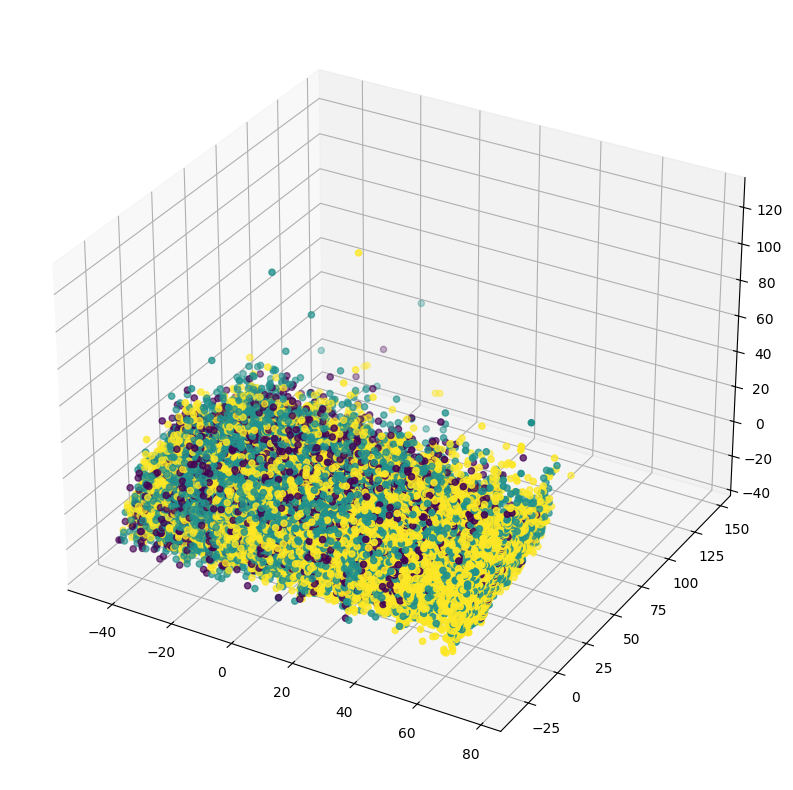

In [55]:
plt.figure(figsize=(16, 10))
ax = plt.axes(projection='3d')



ax.scatter3D(PCA3_dataset["PCA_1"],
             PCA3_dataset["PCA_2"],
             PCA3_dataset["PCA_3"],
             c=PCA3_dataset["Surge_Pricing_Type"])


Советуем еще и замерить попарные корреляции между главными компонентами! Это поможет в ответе на один из тестовых вопросов.

In [56]:
### Your code is here

corr3 = pd.DataFrame()
corr3["PCA_1"] = X.corrwith(pca_df3["PCA_1"]).abs()
corr3["PCA_2"] = X.corrwith(pca_df3["PCA_2"]).abs()
corr3["PCA_3"] = X.corrwith(pca_df3["PCA_3"]).abs()
corr3.head()

,PCA_1,PCA_2,PCA_3
Trip_Distance,0.997767,0.018410,0.064176
Customer_Since_Months,0.121591,0.003500,0.081370
Life_Style_Index,0.480658,0.025901,0.166688
Customer_Rating,0.070104,0.003757,0.236793
Cancellation_Last_1Month,0.000803,0.008960,0.136222


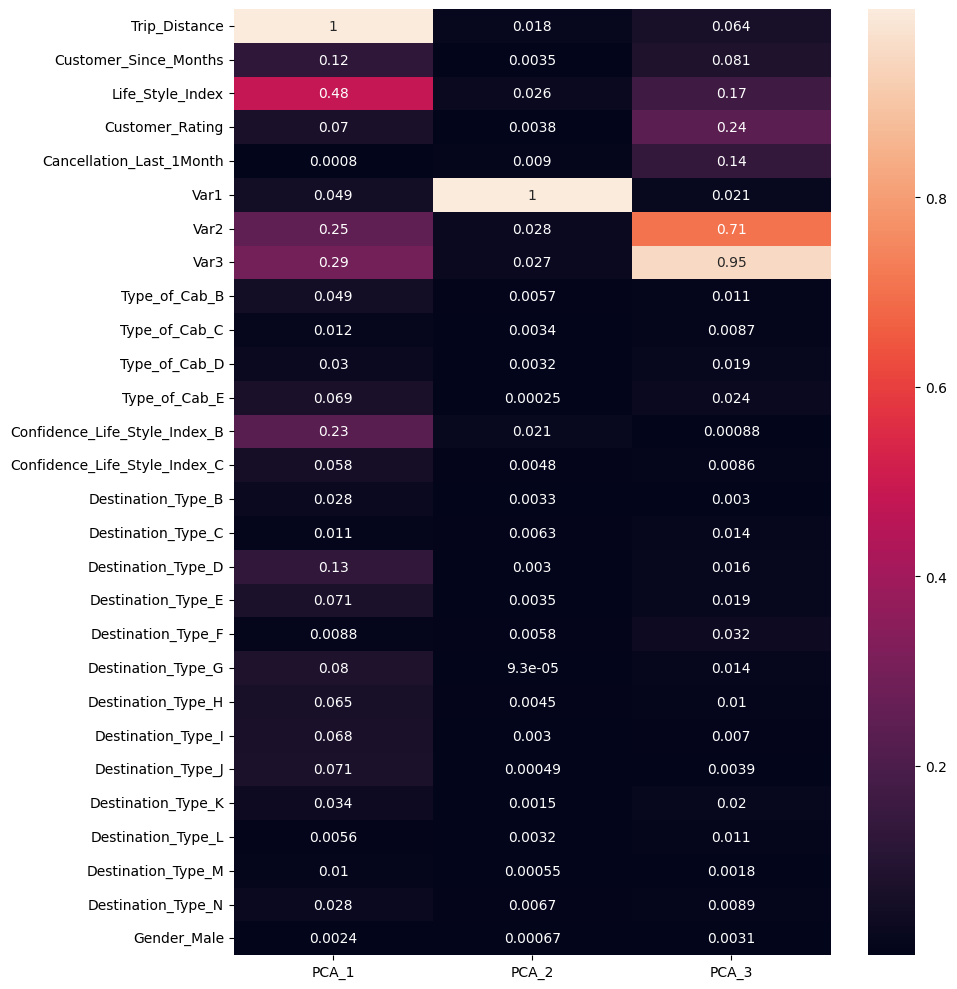

In [57]:
plt.figure(figsize=(10, 10))
sns.heatmap(corr3, annot=True)
plt.tight_layout()

**Задание 4.** Обучите логистическую регрессию на первых двух компонентах центрированных данных и подберите гиперпараметры. Обучите логистическую регрессию на центрированных данных и подберите гиперпараметры. **Сравните метрику accuracy и f1-score на тестовой выборке в двух моделях**.

P.S. для удобства, скорости и нормализации данных (понадобится, так как захотим повалидироваться на параметрах регуляризации) можно построить конструкцию Pipeline c 3 следующими степами: StandardScaler -> PCA -> LogisticRegression

In [58]:
np.random.seed(2022)
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [59]:
X_train, X_test, Y_train, Y_test = train_test_split(X_centered, Y, test_size=0.2,
                                                    shuffle=True, random_state=2022)

In [73]:
pipe = Pipeline([("scaler", StandardScaler()),
                 ("pca", PCA()),
                 ("model", LogisticRegression())])
pipe.fit(X_train, Y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA()),
                ('model', LogisticRegression())])

In [74]:
print(classification_report(Y_test, pipe.predict(X_test), digits=3))

              precision    recall  f1-score   support

           1      0.736     0.539     0.622      5372
           2      0.637     0.825     0.719     11349
           3      0.735     0.589     0.654      9612

    accuracy                          0.680     26333
   macro avg      0.703     0.651     0.665     26333
weighted avg      0.693     0.680     0.675     26333



In [75]:
### Your code is here

param_grid = {'model__penalty': ['l1', 'l2', 'elasticnet'],
              'model__C': [1e-5, 0.0001, 0.001, 0.01]}

search = GridSearchCV(pipe, param_grid, scoring="accuracy")
search.fit(X_train, Y_train)


GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA()),
                                       ('model', LogisticRegression())]),
             param_grid={'model__C': [1e-05, 0.0001, 0.001, 0.01],
                         'model__penalty': ['l1', 'l2', 'elasticnet']},
             scoring='accuracy')

In [76]:
search.best_params_

{'model__C': 0.01, 'model__penalty': 'l2'}

In [77]:
# Изначальные данные
print(classification_report(Y_test, search.predict(X_test), digits=3))

              precision    recall  f1-score   support

           1      0.737     0.538     0.622      5372
           2      0.637     0.826     0.719     11349
           3      0.735     0.588     0.653      9612

    accuracy                          0.680     26333
   macro avg      0.703     0.651     0.665     26333
weighted avg      0.693     0.680     0.675     26333



In [78]:
pipe.set_params(pca__n_components=2)

search.fit(X_train, Y_train)

GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA(n_components=2)),
                                       ('model', LogisticRegression())]),
             param_grid={'model__C': [1e-05, 0.0001, 0.001, 0.01],
                         'model__penalty': ['l1', 'l2', 'elasticnet']},
             scoring='accuracy')

In [79]:
print(classification_report(Y_test, search.predict(X_test), digits=3))

              precision    recall  f1-score   support

           1      0.000     0.000     0.000      5372
           2      0.479     0.692     0.566     11349
           3      0.494     0.509     0.501      9612

    accuracy                          0.484     26333
   macro avg      0.324     0.401     0.356     26333
weighted avg      0.386     0.484     0.427     26333



Кажется, достаточно сильно теряем в качестве! Может, добавить компонент?

**Задание 5.** Обучите модели логистической регресии на нескольких различных компонентах: [2, 4, 8, 16, 28]. **Нарисуйте графики зависимости accuracy, f1-score от количества компонент. Введите их значения через запятую**. При обучении используйте l2-регуляризацию, гиперпараметр C подбирайте по сетке.


In [81]:
### Чтобы не заставлять вас писать похожий на предыдущий код,
### Написали функцию, которая будет обучать модель для
### произвольного числа n_components главных компонент.

def train_pca_i(n_components, X_train, Y_train):
    pipe = Pipeline([('scaler', StandardScaler()), 
                     ('pca', PCA(n_components=n_components)),
                     ('model', LogisticRegression(penalty='l2', solver='saga',random_state=1))])
    
    param_grid = {'model__C': [0.0001, 0.001, 0.01, 0.1]}
    
    grid = GridSearchCV(pipe, param_grid, cv=5)
    grid.fit(X_train, Y_train)
    
    report = classification_report(Y_test, grid.predict(X_test), output_dict=True)
    return (report['accuracy'], 
            report['weighted avg']['f1-score'])

In [82]:
%%time
accuracy_dict, f1_score_dict = {}, {}
components_list = [2, 4, 8, 16, 28]

for n_components in components_list:
    metrics = train_pca_i(n_components, X_train, Y_train)
    accuracy_dict[n_components] = metrics[0]
    f1_score_dict[n_components] = metrics[1]

CPU times: total: 1min 31s
Wall time: 1min 28s


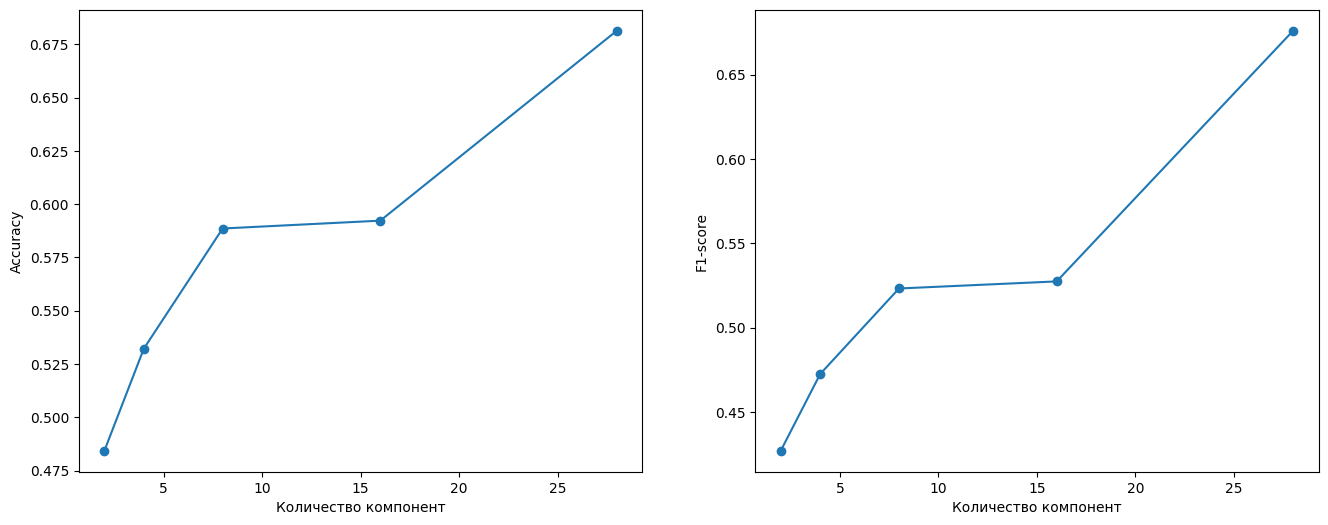

In [96]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

axes[0].plot(accuracy_dict.keys(), accuracy_dict.values(), marker='o')
axes[0].set(xlabel="Количество компонент",
            ylabel="Accuracy")

axes[1].plot(f1_score_dict.keys(), f1_score_dict.values(), marker='o')
axes[1].set(xlabel="Количество компонент",
            ylabel="F1-score")

plt.show()

Обычно, когда решается какая-то высокоразмерная предсказательная задача, где тысячи признаков, функция качества PCA моделей похожа на параболу ветвями вниз в зависимости от количества компонент (для совсем маленьких и больших n_component качество маленькое, при этом есть где-то промежуточное значение).

Как думаете, почему здесь у нас непрерывно растущие графики качества?

Может, изначальные признаки были слишком хороши?

### t-SNE

Напомним, что метод заключается в введении некоторых функций, основанных на расстоянии между признаками, которые измеряют близость объектов. Функций, как вы помните, две, и они заданы в исходном и новом пространствах соотвественно. Далее минимизируем дивергенцию Кульбака-Лейблера по координатaм в новом пространстве

**Задание 6.** Обучите t-sne c `n_components=2` на изначальных данных и визуализируйте результаты с учетом известных классов. 

P.S. если устанете ждать обучения TSNE, или упадет ошибка по типу oom, то можно сократить число объектов в датасете до, например, пары тысяч. Это и следующее задания никак проверяться системой не будут. Вам достаточно повторить упражнение с практики и получить какое-то более адекватное (по сравнению с PCA) изображение классов.

In [107]:
from sklearn.manifold import TSNE

### Your code is here

TSNE = TSNE(n_components=2, random_state=2022)
tsne_df = pd.DataFrame(TSNE.fit_transform(X.head(2000)))

In [108]:
tsne_df.columns = ["TSNE_1", "TSNE_2"]
tsne_df["Surge_Pricing_Type"] = Y.head(2000).values.reshape(-1, 1)
tsne_df.head()

,TSNE_1,TSNE_2,Surge_Pricing_Type
0,-20.837664,-10.152955,2
1,-8.365729,-10.106830,2
2,12.475842,-2.386687,2
3,25.808615,-12.366309,3
4,16.129103,5.395453,2


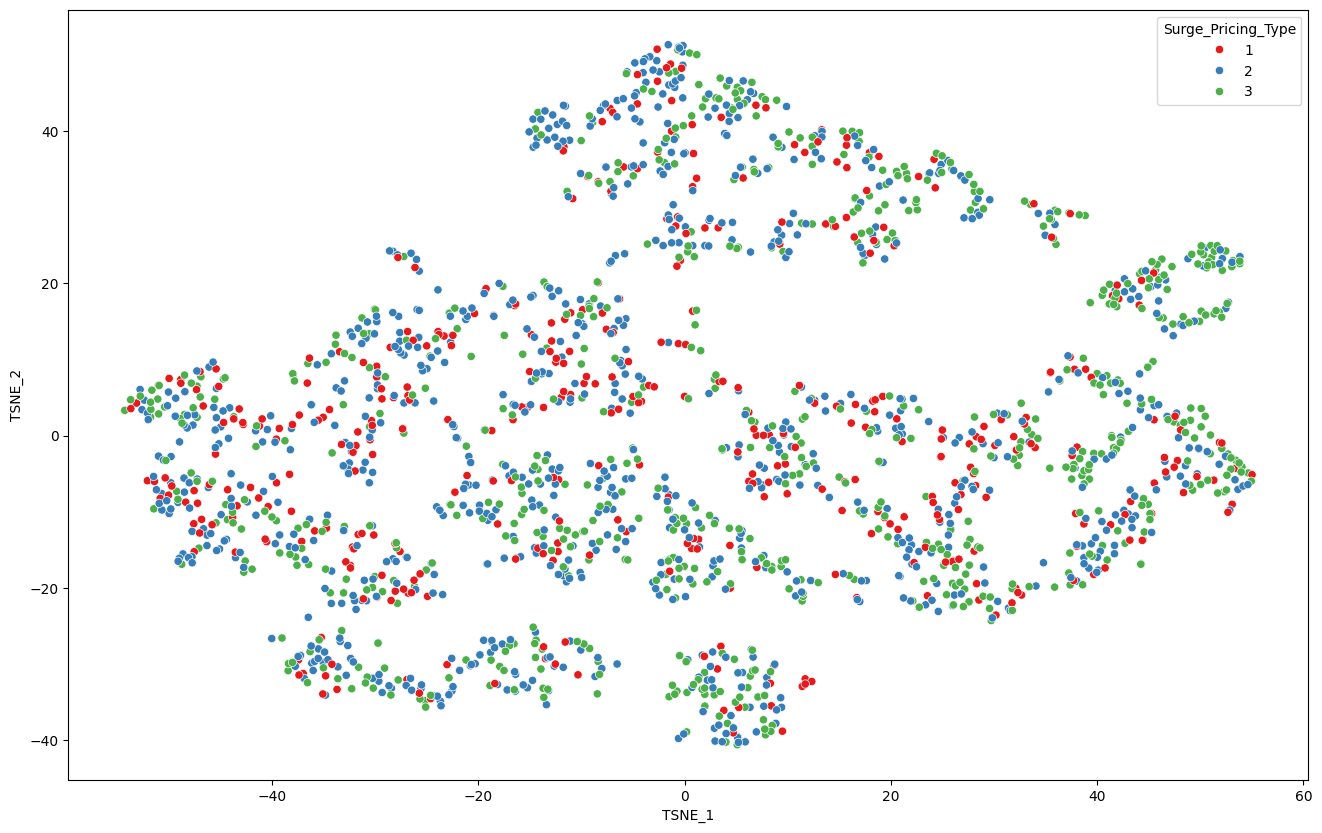

In [117]:
plt.figure(figsize=(16, 10))
sns.scatterplot(data=tsne_df, x="TSNE_1", y="TSNE_2", hue='Surge_Pricing_Type', palette='Set1')

plt.show()

**Задание 7.** Обучите t-sne с `n_components=3` на изначальных данных и визуализируйте результаты с учетом известных классов.

In [119]:
### Your code is here
from sklearn.manifold import TSNE

TSNE = TSNE(n_components=3, random_state=2022)
tsne_df = pd.DataFrame(TSNE.fit_transform(X.head(2000)))


In [120]:
tsne_df.columns = ["TSNE_1", "TSNE_2", "TSNE_3"]
tsne_df["Surge_Pricing_Type"] = Y.head(2000).values.reshape(-1, 1)
tsne_df.head()

,TSNE_1,TSNE_2,TSNE_3,Surge_Pricing_Type
0,-7.409397,-7.234789,7.866551,2
1,-2.176359,-4.844615,7.374212,2
2,-0.968539,-2.422859,-2.610003,2
3,7.672105,-4.100488,-3.939111,3
4,4.030602,-1.617018,2.175808,2


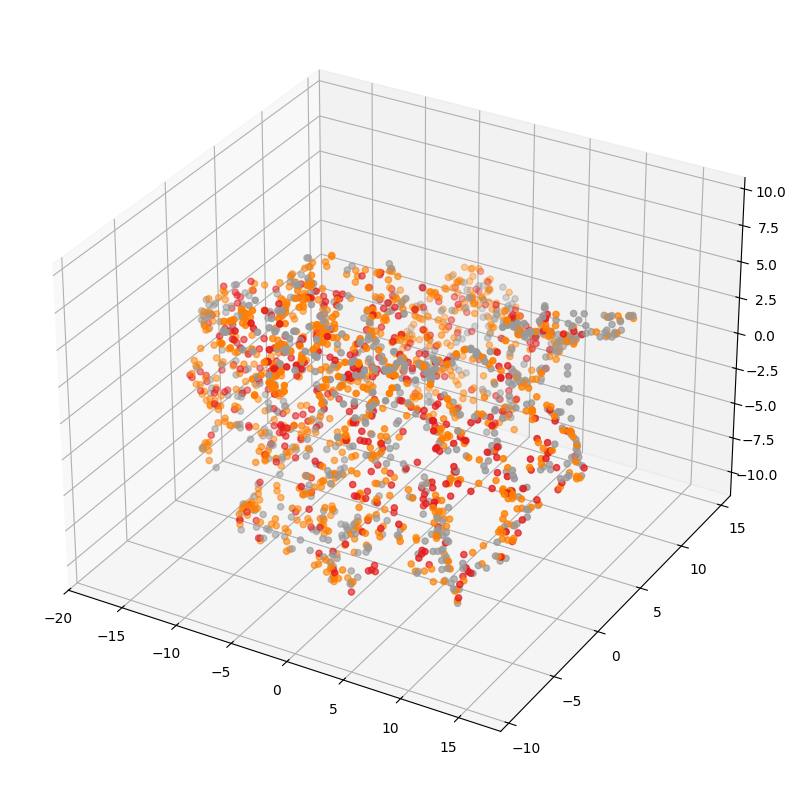

In [125]:
fig = plt.figure(figsize=(16, 10))
ax = plt.axes(projection="3d")

ax.scatter3D(tsne_df["TSNE_1"],
             tsne_df["TSNE_2"],
             tsne_df["TSNE_3"],
             c=tsne_df["Surge_Pricing_Type"], cmap='Set1')

plt.show()

|Советуем обрезать датасет до маленького числа объектов (чтобы точки и их группки были хорошо различимы) и поиграться с гиперпараметрами класса Tsne! Обычно такая "игра" может привести к куда более красивым результатам по сравнению с теми, что получены с дефолтными настройками!